In [5]:
import numpy as np
import os

np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

In [6]:
PROJECT_ROOT_DIR = "/home/naman"
IMAGE_DIR = "img"

In [19]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    X_train = mnist.data[:60000]
    Y_train = mnist.target[:60000]
    X_test = mnist.data[60000:]
    Y_test = mnist.target[60000:]
    return X_train,Y_train, X_test, Y_test

In [20]:
#Loading and sorting data
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [21]:
def save_fig(fig_id, tight_layout=True):
        path = os.path.join(PROJECT_ROOT_DIR, "images", IMAGE_DIR, fig_id + ".png")
        print("Saving figure", fig_id)
        if tight_layout:
            plt.tight_layout()
        plt.savefig(path, format='png', dpi=300)

Saving figure some_digit_plot


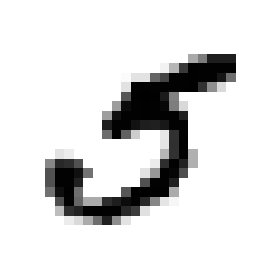

In [24]:
#plotting random digit 
some_digit = mnist.data[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [41]:
def train_predict(some_digit,X_train,Y_train, X_test, Y_test):
    shuffle_index = np.random.permutation(60000)
    X_train, y_train = X_train[shuffle_index], Y_train[shuffle_index]
    # Example: Binary number 5 Classifier
    y_train_5 = (Y_train == 5)
    y_test_5 = (Y_test == 5)

In [49]:
train_predict(some_digit, X_train,Y_train, X_test, Y_test)

#SGD classifier for digit 5 detection
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train_5)
print(sgd.predict([some_digit]))

[ True]


In [54]:
#SGD classifier for digit 5 detection Test data
sgd.fit(X_test, y_test_5)
print(sgd.predict([some_digit]))

[ True]


In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90915, 0.83355, 0.9253 ])

In [52]:
#SGD classifier for digit 5 detection Test data
sgd.fit(X_test, y_test_5)
print(sgd.predict([some_digit]))

[ True]


In [53]:
#Cross validation score for test data
cross_val_score(sgd, X_test, y_test_5, cv=3, scoring="accuracy")

array([0.8845231 , 0.80228023, 0.93819382])